## Observations and Insights 

*Almost the same number of mice across all treatments, which makes the data more reliable and less bias.

*Gender of the mice is fairly even, which shouldn't significantly affect the results of the treatment.

*There is a fairly strong correlation between the weight of a mouse and tumor volume that underwent the Capomulin treatment.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

mice_df = pd.merge(mouse_metadata_df, study_results_df, how='outer')

# Display the data table for preview
mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = mice_df[mice_df.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows based on 2 columns are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on 2 columns are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_df.loc[mice_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
temp_df = mice_df.copy()

g989 = temp_df[temp_df['Mouse ID'] == 'g989'].index

temp_df.drop(g989, inplace=True)

clean_mice_df = pd.DataFrame(temp_df)

clean_mice_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen = clean_mice_df.groupby(by='Drug Regimen')

tumor_mean = drug_regimen['Tumor Volume (mm3)'].mean()
tumor_median = drug_regimen['Tumor Volume (mm3)'].median()
tumor_var = drug_regimen['Tumor Volume (mm3)'].var()
tumor_std = drug_regimen['Tumor Volume (mm3)'].std()
tumor_sem = drug_regimen['Tumor Volume (mm3)'].sem()

summary_df = pd.merge(tumor_mean, tumor_median, on='Drug Regimen')
summary_df = pd.merge(summary_df, tumor_var, on='Drug Regimen')
summary_df = pd.merge(summary_df, tumor_std, on='Drug Regimen')
summary_df = pd.merge(summary_df, tumor_sem, on='Drug Regimen')

summary_df.columns = ['mean', 'median', 'var', 'std', 'sem']

summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = clean_mice_df.groupby(by='Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


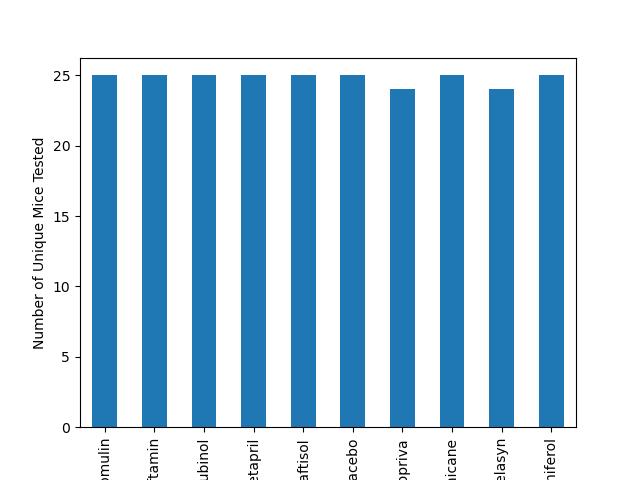

Text(0, 0.5, 'Number of Unique Mice Tested')

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

unique_mice_df = pd.DataFrame(drug_regimen['Mouse ID'].nunique())

bar_plot = unique_mice_df.plot.bar(rot=90, legend=False)
bar_plot.set_ylabel("Number of Unique Mice Tested")

<IPython.core.display.Javascript object>


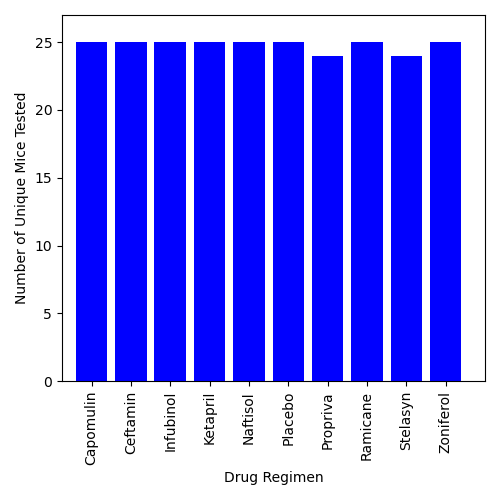

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(unique_mice_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(5,5))
plt.bar(x_axis, unique_mice_df["Mouse ID"], color='b', alpha=1, align="center")
plt.xticks(tick_locations, unique_mice_df.index, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(unique_mice_df["Mouse ID"])+2)

# Set a Title and labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

# Save graph and show the graph
plt.tight_layout()
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_mice_df.drop_duplicates('Mouse ID')

mice_gender_count = mice_gender['Sex'].value_counts()

In [12]:
mice_gender_count

Male      125
Female    123
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


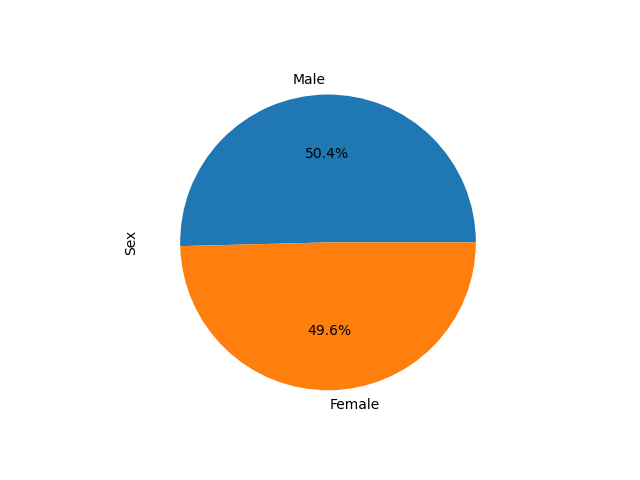

In [13]:
pie_chart = mice_gender_count.plot.pie(autopct='%1.1f%%')

<IPython.core.display.Javascript object>


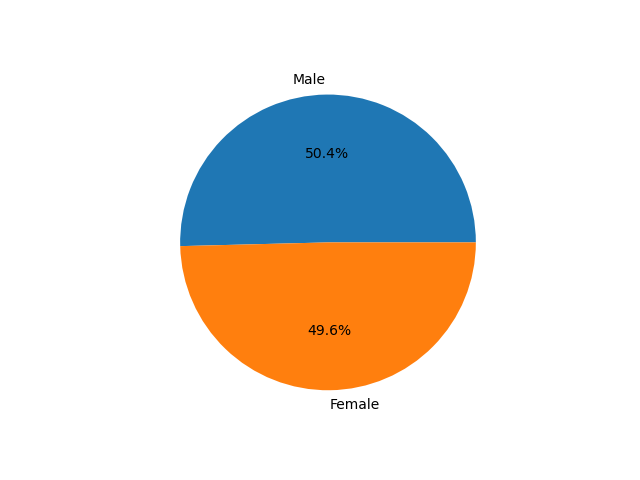

([<matplotlib.patches.Wedge at 0x20e4f2b0eb0>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender_count, autopct='%1.1f%%', labels=['Male', 'Female'])

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
mice_last_timepoint_df = clean_mice_df.drop_duplicates('Mouse ID', keep='last')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drugs_timepoint_df = mice_last_timepoint_df.loc[mice_last_timepoint_df['Drug Regimen'].isin(drugs)]

drugs_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    tumor_data = drugs_timepoint_df.loc[drugs_timepoint_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]    
    
    # add subset 
    tumor_vol.append(tumor_data)    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = tumor_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lbound = lowerq - (1.5 * iqr)
    ubound = upperq + (1.5 * iqr)
    
    # Print results
    print(f"For {drug}: ")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range of tumor volumes is: {iqr}")
    print(f"The lower bound is: {lbound}")
    print(f"The upper bound is: {ubound}")
    print(f"The outliers is: {tumor_data.loc[(tumor_data < lbound) | (tumor_data > ubound)]}")
    print("------------------------------------------")    

For Capomulin: 
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
The lower bound is: 20.70456164999999
The upper bound is: 51.83201549
The outliers is: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------
For Ramicane: 
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range of tumor volumes is: 9.098536719999998
The lower bound is: 17.912664470000003
The upper bound is: 54.30681135
The outliers is: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------
For Infubinol: 
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range of tumor volumes is: 11.477135160000003
The lower bound is: 36.83290494999999
The upper bound is: 82.74144559000001
The outliers is: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------------

<IPython.core.display.Javascript object>


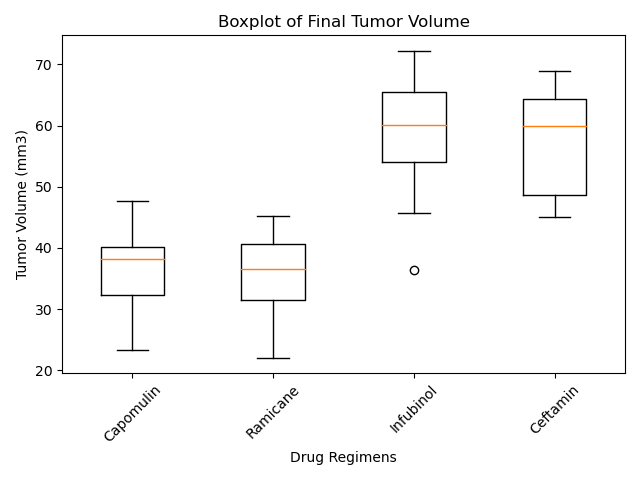

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels=drugs)
plt.xticks(rotation=45)
plt.title('Boxplot of Final Tumor Volume')
plt.xlabel('Drug Regimens')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [19]:
# Use mouse id s185
s185 = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185']
s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


<IPython.core.display.Javascript object>


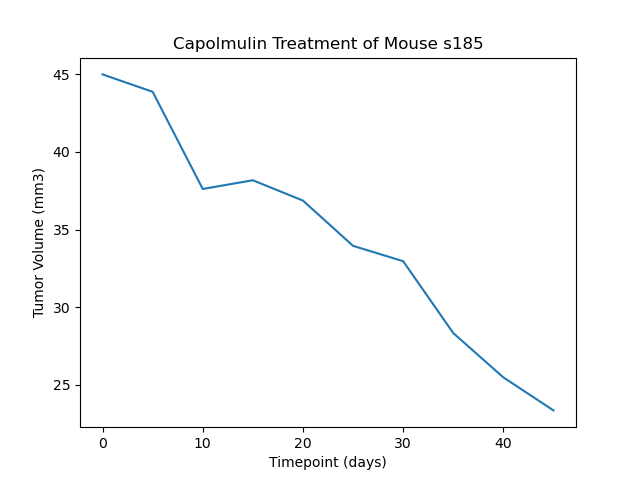

Text(0.5, 1.0, 'Capolmulin Treatment of Mouse s185')

In [20]:
line_plot = s185.plot.line(x='Timepoint', y='Tumor Volume (mm3)', legend=False)
line_plot.set_xlabel("Timepoint (days)")
line_plot.set_ylabel("Tumor Volume (mm3)")
line_plot.set_title("Capolmulin Treatment of Mouse s185")

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [22]:
capomulin_df_id = capomulin_df.groupby('Mouse ID').mean()
capomulin_df_id

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


<IPython.core.display.Javascript object>


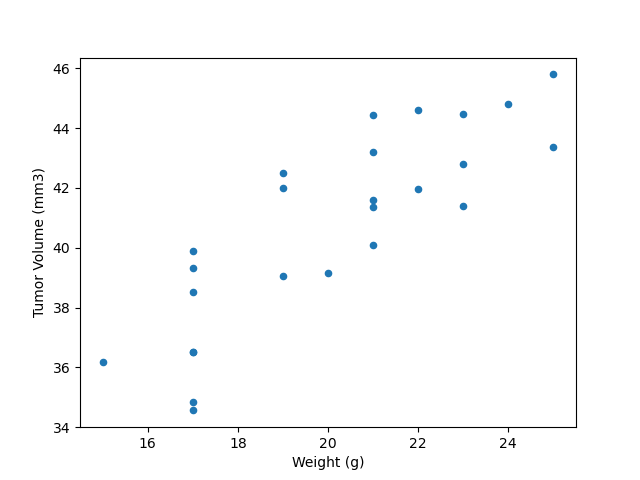

In [23]:
capomulin_df_id.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin_df_id.iloc[:,1]
tumorvolume = capomulin_df_id.iloc[:,3]
correlation = st.pearsonr(weight,tumorvolume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


<IPython.core.display.Javascript object>


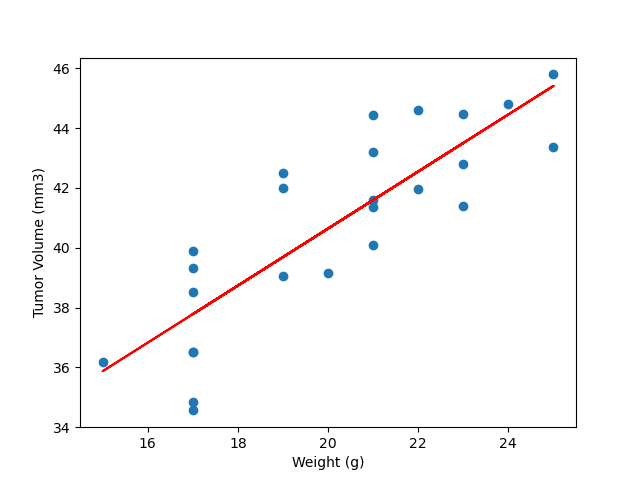

In [25]:
# Add the linear regression equation and line to plot
x_values = capomulin_df_id['Weight (g)']
y_values = capomulin_df_id['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()